# RO47019: Intelligent Control Systems Practical Assignment
* Period: 2022-2023, Q3
* Course homepage: https://brightspace.tudelft.nl/d2l/home/500969
* Instructor: Cosimo Della Santina (C.DellaSantina@tudelft.nl)
* Teaching assistant: Ruben Martin Rodriguez (R.MartinRodriguez@student.tudelft.nl)
* (c) TU Delft, 2023

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`. Remove `raise NotImplementedError()` afterwards. Moreover, if you see an empty cell, please DO NOT delete it, instead run that cell as you would run all other cells. Please fill in your name(s) and other required details below:

In [1]:
# Please fill in your names, student numbers, netID, and emails below.
STUDENT_1_NAME = "Zekai Chen"
STUDENT_1_STUDENT_NUMBER = "5705762"
STUDENT_1_NETID = "zchen12"
STUDENT_1_EMAIL = "Z.Chen-58@student.tudelft.nl"

In [2]:
# Note: this block is a check that you have filled in the above information.
# It will throw an AssertionError until all fields are filled
assert STUDENT_1_NAME != ""
assert STUDENT_1_STUDENT_NUMBER != ""
assert STUDENT_1_NETID != ""
assert STUDENT_1_EMAIL != ""

### General announcements

* Do *not* share your solutions, and do *not* copy solutions from others. By submitting your solutions, you claim that you alone are responsible for this code.

* Do *not* email questions directly, since we want to provide everybody with the same information and avoid repeating the same answers. Instead, please post your questions regarding this assignment in the correct support forum on Brightspace, this way everybody can benefit from the response. If you do have a particular question that you want to ask directly, please use the scheduled Q&A hours to ask the TA.

* There is a strict deadline for each assignment. Students are responsible to ensure that they have uploaded their work in time. So, please double check that your upload succeeded to the Brightspace and avoid any late penalties.

* This [Jupyter notebook](https://jupyter.org/) uses `nbgrader` to help us with automated tests. `nbgrader` will make various cells in this notebook "uneditable" or "unremovable" and gives them a special id in the cell metadata. This way, when we run our checks, the system will check the existence of the cell ids and verify the number of points and which checks must be run. While there are ways that you can edit the metadata and work around the restrictions to delete or modify these special cells, you should not do that since then our nbgrader backend will not be able to parse your notebook and give you points for the assignment. You are free to add additional cells, but if you find a cell that you cannot modify or remove, please know that this is on purpose.

* This notebook will have in various places a line that throws a `NotImplementedError` exception. These are locations where the assignment requires you to adapt the code! These lines are just there as a reminder for youthat you have not yet adapted that particular piece of code, especially when you execute all the cells. Once your solution code replaced these lines, it should accordingly *not* throw any exceptions anymore.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

# Task 2a.2 - PD + gravity compensation (3p)

**Author:** Maximilian Stölzle (M.W.Stolzle@tudelft.nl)

In this task, you will implement a PD + gravity compensation controller. The controller consists of the feedforward term

\begin{equation}
\tau_\mathrm{ff} = G(\theta),
\end{equation}

and the PD feedback term

\begin{equation}
\tau_\mathrm{fb} = k_\mathrm{p} \, (\theta^\mathrm{d}-\theta) + k_\mathrm{d} \, (\dot{\theta}^\mathrm{d}-\dot{\theta}).
\end{equation}

In [3]:
# Reloads the python files outside of this notebook automatically
%load_ext autoreload
%autoreload 2

# import all Python modules
from distutils.util import strtobool
from functools import partial
from IPython.display import display, HTML  # For animations in the notebook
from jax.config import config as jax_config

jax_config.update("jax_platform_name", "cpu")  # set default device to 'cpu'
jax_config.update("jax_enable_x64", True)  # double precision
from jax import numpy as jnp
import os
from pathlib import Path

from jax_double_pendulum.dynamics import dynamical_matrices
from jax_double_pendulum.robot_parameters import ROBOT_PARAMS

# define boolean to check if the notebook is run for the purposes of autograding
AUTOGRADING = strtobool(os.environ.get("AUTOGRADING", "false"))

## Derivation of the steady-state closed-loop system (1p)

Please derive the closed-loop system by substituting the control law into the equations of motion of the system and then imposing steady state conditions. Additonally, we assume $\dot{\theta}^\mathrm{d} = 0$. What is the resulting equation?

**A.** $0 = 0$

**B.** $G(\theta) = k_\mathrm{p} \, (\theta^\mathrm{d} - \theta)$

**C.** $G(\theta) = k_\mathrm{p} \, (\theta^\mathrm{d} - \theta) + k_\mathrm{d} \, (\dot{\theta}^\mathrm{d}-\dot{\theta})$

**D.** $M(\theta) \: \ddot{\theta} + C(\theta, \dot{\theta}) \: \ddot{\theta} + G(\theta) = \tau_\mathrm{fb}$

In [4]:
# please write the answer ("A", "B", "C", or "D") into the `answer_1` variable
answer_1 = None

# YOUR CODE HERE
answer_1 = "C"

In [5]:
# DO NOT REMOVE OR MODIFY THIS CELL
assert answer_1 in ["A", "B", "C", "D"], 'Please answer "A", "B", "C", or "D"'


## Implementing `ctrl_ff_gravity_compensation` (0.5p)
Please implement a feedforward term to compensate for gravitational effects into the function `ctrl_ff_gravity_compensation` in the notebook `controllers.ipynb`.
You can use `M, C, G = dynamical_matrices_fn(.)` to access the components of the equations of motion.

In [7]:
# DO NOT REMOVE OR MODIFY THIS CELL

# import gravity compensation controller from controllers.ipynb
from ipynb.fs.full.controllers import ctrl_fb_pd, ctrl_ff_gravity_compensation

# construct feedforward controller
ctrl_ff = partial(
    ctrl_ff_gravity_compensation, partial(dynamical_matrices, ROBOT_PARAMS)
)

# test output shape of ctr_ff_gravity_compensation
_th, _th_d = jnp.ones((2,)), jnp.ones((2,))
_th_des, _th_d_des, _th_dd_des = jnp.ones((2,)), jnp.ones((2,)), jnp.ones((2,))
_tau_dummy = ctrl_ff(_th, _th_d, _th_des, _th_d_des, _th_dd_des)
print("Computed torque:", _tau_dummy, "Nm")
assert _tau_dummy.shape == (2,), "The computed torque needs to be of shape (2, )"

Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=1/0)> Traced<ShapedArray(float64[2,2])>with<DynamicJaxprTrace(level=1/0)> Traced<ShapedArray(float64[2])>with<DynamicJaxprTrace(level=1/0)>
Computed torque: [116.60804365  15.90109686] Nm


## Simulating the closed-loop system (1.5p)

Please simulate the closed-loop system using a PD + gravity compensation controller for regulating the system to follow the given ellipse trajectory. You can use the notebook from Task 2a.1 as an inspiration. Analogue to Task 2a.1, please initialize the double pendulum at `th_0`. Please find the lowest PD gains which are able to achieve an RMSE for the positional error of the end-effector of (just) lower than 0.06m.

In [8]:
from jax_double_pendulum.analysis import *
from jax_double_pendulum.motion_planning import (
    generate_ellipse_trajectory,
    ELLIPSE_PARAMS,
)
from jax_double_pendulum.robot_parameters import ROBOT_PARAMS
from jax_double_pendulum.robot_simulation import simulate_robot
from jax_double_pendulum.visualization import animate_robot

# simulation parameters
sim_duration = 10.0  # [s]
sim_dt = 1e-2  # [s]

# define time steps
t_ts = sim_dt * jnp.arange(int(sim_duration / sim_dt))

# generate trajectory
traj_ts = generate_ellipse_trajectory(
    rp=ROBOT_PARAMS,
    t_ts=t_ts,
    **ELLIPSE_PARAMS,
)

# initial link angles (i.e. at the first time-step)
th_0 = traj_ts["th_ts"][0] - jnp.array([0.1, 0.2])

In [9]:
# controller parameters
# define the proportional gain matrix kp and the derivative gain matrix kd
kp = jnp.zeros((2, 2))
kd = jnp.zeros((2, 2))

# YOUR CODE HERE
kp = jnp.array([[4500, 0], [0, 4500]])
kd = jnp.array([[500, 0], [0, 500]])

In [15]:
# simulate the robot with the given controller
# save the simulation date in `sim_ts`

# YOUR CODE HERE
sim_ts = simulate_robot(
    rp=ROBOT_PARAMS,
    t_ts=t_ts,
    th_0=th_0,
    th_d_0=traj_ts["th_d_ts"][0],
    th_des_ts=traj_ts["th_ts"],
    th_d_des_ts=traj_ts["th_d_ts"],
    th_dd_des_ts=traj_ts["th_dd_ts"],
    ctrl_ff=ctrl_ff,
    ctrl_fb=partial(ctrl_fb_pd, kp=kp, kd=kd),
)

# evaluate the control performance quantitatively
rmse_th, rmse_th_d, rmse_th_dd = compute_configuration_space_rmse(traj_ts, sim_ts)
rmse_x, rmse_x_d, rmse_x_dd = compute_operational_space_rmse(traj_ts, sim_ts)
with jnp.printoptions(precision=3):
    print(
        "RMSE theta:",
        rmse_th,
        "rad, RMSE theta_d:",
        rmse_th_d,
        "rad/s, RMSE theta_dd:",
        rmse_th_dd,
        "rad/s^2",
    )
    print(
        "RMSE x:",
        f"{jnp.linalg.norm(rmse_x):.4f}",
        "m, RMSE x_d:",
        f"{jnp.linalg.norm(rmse_x_d):.3f}",
        "m/s, RMSE x_dd:",
        f"{jnp.linalg.norm(rmse_x_dd):.2f}",
        "m/s^2",
    )

RMSE theta: [0.016 0.022] rad, RMSE theta_d: [0.073 0.151] rad/s, RMSE theta_dd: [0.79  9.534] rad/s^2
RMSE x: 0.0316 m, RMSE x_d: 0.222 m/s, RMSE x_dd: 9.76 m/s^2


In [16]:
# DO NOT REMOVE OR MODIFY THIS CELL

rmse_x, rmse_x_d, rmse_x_dd = compute_operational_space_rmse(traj_ts, sim_ts)
assert (
    jnp.linalg.norm(rmse_x) < 0.06
)  # end-effector position needs to be smaller than 0.06m


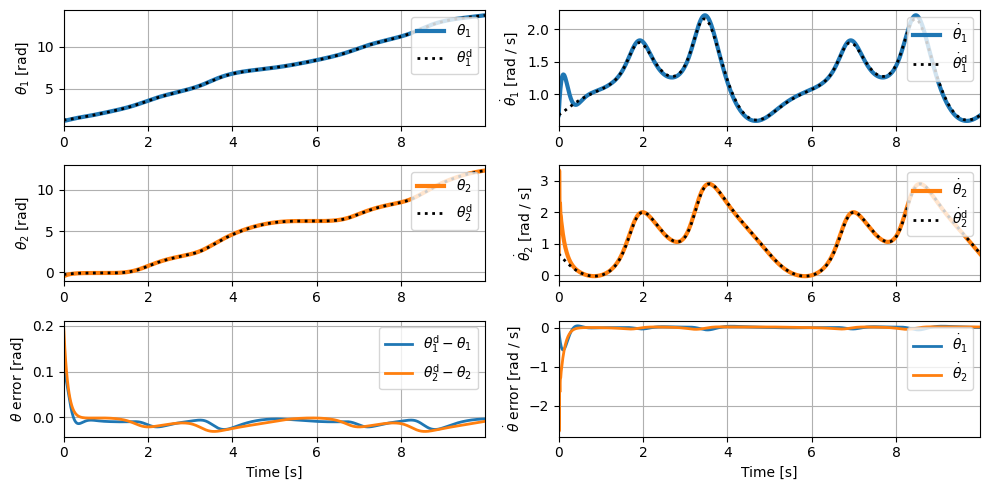

In [17]:
# define folder where to save animations and plots
outputs_dir = Path("outputs")
outputs_dir.mkdir(parents=True, exist_ok=True)

# plot the configuration-space evolution
plot_configuration_space_trajectory_following(
    traj_ts,
    sim_ts,
    filepath=str(
        outputs_dir / "task_2a-2_configuration_space_trajectory_following.pdf"
    ),
)

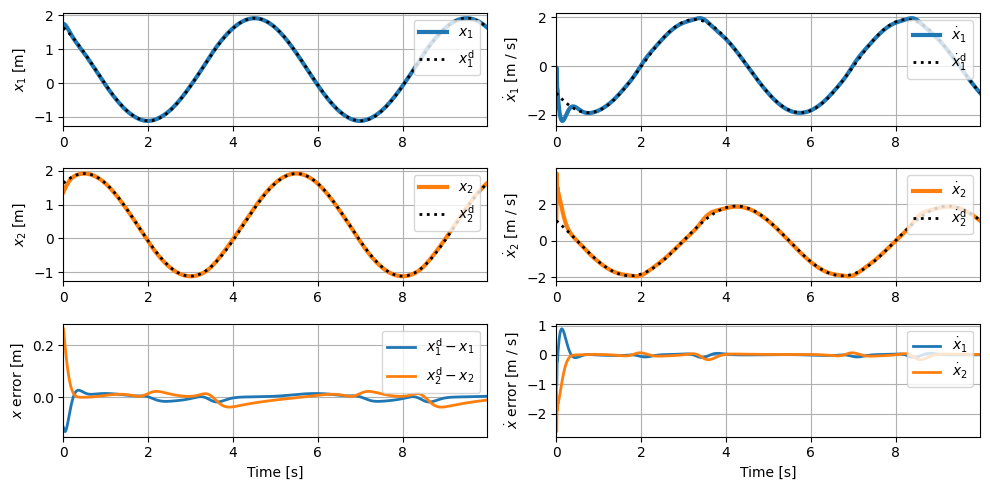

In [18]:
# plot the operational-space evolution
plot_operational_space_trajectory_following(
    traj_ts,
    sim_ts,
    filepath=str(outputs_dir / "task_2a-2_operational_space_trajectory_following.pdf"),
)

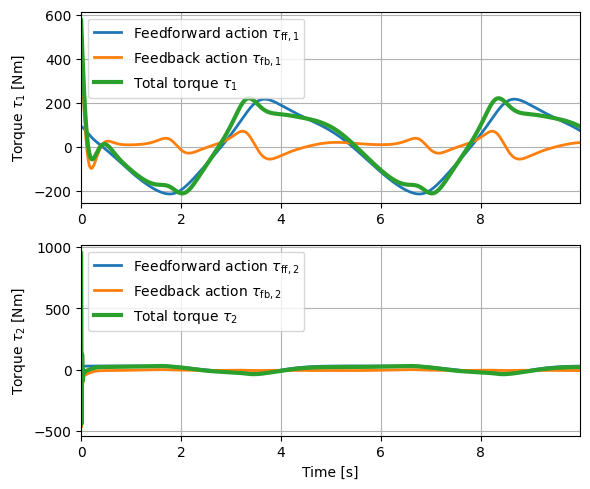

In [19]:
# plot the actuation sequence
plot_actuation(sim_ts, filepath=str(outputs_dir / "task_2a-2_actuation.pdf"))

In [20]:
if not AUTOGRADING:
    ani = animate_robot(
        ROBOT_PARAMS,
        traj_ts=traj_ts,
        sim_ts=sim_ts,
        step_skip=5,
        show=False,
        filepath=str(outputs_dir / "task_2a-2_controlled_robot.mp4"),
    )
    display(HTML(ani.to_html5_video()))